<h2>A quick overview</h2>

This is a basic implementation of a script that solves the N-Queen problem whose description can be found [here](http://en.wikipedia.org/wiki/Eight_queens_puzzle).
<br/>Proposed script searches for a valid solution using one of three approaches:
* **Random search**
* **Backtracking**
* **Forward checking**

For performance measurement, visualization and utility purposes we import 3 modules: **time**, **pyplot** and **numpy**

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

First thing that has to be done in order to solve N-Queen problem is creating a board on which queens will be placed. The following implementation uses a single array containing given number of integers to represent the board. Elements of the array indicate position of a queen in each row of the board. For example, array [2, 0, 3, 1] represents a 4 x 4 game board that looks like this:<br>
.  .  Q  .<br>Q  .  .  .<br>.  .  .  Q<br>.  Q  .  .<br>
Where Q represents a queen's position.<br><br>
The board can be created by using function *initialize_the_board(n)* where n is board's size.
Let's say we have a 5 x 5 board.

In [2]:
def initialize_the_board(n):
    return [i for i in range(n)]

board = initialize_the_board(5)

We can visualize position of queens by using function below

In [3]:
def print_board(solution):
    for i in solution:
        line = ". " * i
        line += "Q "
        line += ". " * (len(solution) - i - 1)
        print(line)
    print()
    
print_board(board)

Q . . . . 
. Q . . . 
. . Q . . 
. . . Q . 
. . . . Q 



Next we should write a function that checks if a given setting of queens is a valid solution.  

In [4]:
def is_valid(solution):
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            if solution[i] == solution[j]:
                return False
            if abs(i - j) == abs(solution[i] - solution[j]):
                return False
    return True

*solution* argument is a setting of queens represented as an array that does not necessarily have to be the same size as the board. This will come in handy during checking partial solutions in Backtracking and Forward checking approaches. 
Function returns false if two queens share the same column or diagonal. Since we used array as a representation of the board we do not have to worry about two queens sharing the same row.

Random search is definitely an easiest approach. According to its name, all we need to do is to shuffle our board array and check if it satisfies requirements. If it does, we found solution, if not - we shuffle again.

In [5]:
def random_search():
    solution = board.copy()
    iterations = 0
    while not is_valid(solution):
        iterations += 1
        np.random.shuffle(solution)
    return solution, iterations

s, i = random_search()
print(f"Solution found in {i} iteration(s)")
print_board(s)

Solution found in 41 iteration(s)
. . Q . . 
Q . . . . 
. . . Q . 
. Q . . . 
. . . . Q 



Another approrach we can take is called Backtracking. Its implementation involves using an utility function called *get_position()* which returns a random position on which we can place queen. The function returns a valid solution as well as a number of iterations it needed to find the solution. 

In [6]:
def get_position(possible_positions):
    if len(possible_positions) == 0:
        return None
    else:
        np.random.shuffle(possible_positions)
        return possible_positions.pop()
    

def backtracking():
    solution = []
    current_row = 0
    unchecked_positions_for_each_row = [[i for i in range(len(board))] for _ in range(len(board))]
    iterations = 0
    while True:
        iterations += 1
        if current_row != len(board):
            position = get_position(unchecked_positions_for_each_row[current_row])
            if position is None:
                if current_row == 0:
                    return -1, -1
                unchecked_positions_for_each_row[current_row] = [i for i in range(len(board))]
                current_row -= 1
                solution.pop()
            else:
                solution.append(position)
                if is_valid(solution):
                    current_row += 1
                else:
                    solution.pop()
        else:
            return solution, iterations 
s, i = backtracking()
print_board(s)
print(f"Solution found in {i} iteration(s)")

. Q . . . 
. . . Q . 
Q . . . . 
. . Q . . 
. . . . Q 

Solution found in 9 iteration(s)


Last approach we are going to implement is called Forward checking. This time we use *get_possible_position()* and *try_to_remove()* functions that are responsible for calculating viable positions for queens in subsequent rows and safely removing element from python arrays respectively. Similarly to *backtracking()* function this one also returns both solution and number of iterations it took to found it.

In [7]:
def try_to_remove(collection, arg):
    try:
        collection.remove(arg)
        return collection
    except ValueError:
        return collection

def get_possible_positions(row, checked_for_each_row, solution):
        possibilities = [i for i in range(len(board))]
        current_row = 0
        for position in solution:
            possibilities = try_to_remove(possibilities, position)
            possibilities = try_to_remove(possibilities, position + row - current_row)
            possibilities = try_to_remove(possibilities, position - row + current_row)
            current_row += 1
        for pos in checked_for_each_row:
            possibilities = try_to_remove(possibilities, pos)
        return possibilities

def forward_checking():
        solution = []
        current_row = 0
        checked_for_each_row = [set() for _ in range(len(board))]
        iterations = 0
        possibilities = [[i for i in range(len(board))] for _ in range(len(board))]
        while True:
            iterations += 1
            if current_row != len(board):
                possibilities[current_row] = get_possible_positions(current_row, checked_for_each_row[current_row], solution)
                position = get_position(possibilities[current_row])
                if position is None:
                    if current_row == 0:
                        return -1, -1
                    possibilities[current_row] = [i for i in range(len(board))]
                    checked_for_each_row[current_row].clear()
                    current_row -= 1
                    checked_for_each_row[current_row].add(solution.pop())
                else:
                    solution.append(position)
                    current_row += 1
            else:
                return solution, iterations

s, i = forward_checking()
print(f"Solution found in {i} iteration(s)")
print_board(s)

Solution found in 10 iteration(s)
Q . . . . 
. . Q . . 
. . . . Q 
. Q . . . 
. . . Q . 



Now, that all approaches work, we can compare their performance speed. Let's start with the simplest one - Random search. We will use it to solve problem for n ranging from 4 (because 4 is the least board size for which we can find a solution) to 19 and see how long it takes to find a solution if we rely purely on randomness.

Execution time for n = 4: 0.000 seconds
Execution time for n = 5: 0.000 seconds
Execution time for n = 6: 0.001 seconds
Execution time for n = 7: 0.000 seconds
Execution time for n = 8: 0.001 seconds
Execution time for n = 9: 0.002 seconds
Execution time for n = 10: 0.032 seconds
Execution time for n = 11: 0.016 seconds
Execution time for n = 12: 0.403 seconds
Execution time for n = 13: 0.073 seconds
Execution time for n = 14: 0.350 seconds
Execution time for n = 15: 0.720 seconds
Execution time for n = 16: 3.947 seconds
Execution time for n = 17: 1.385 seconds
Execution time for n = 18: 46.378 seconds
Execution time for n = 19: 113.689 seconds


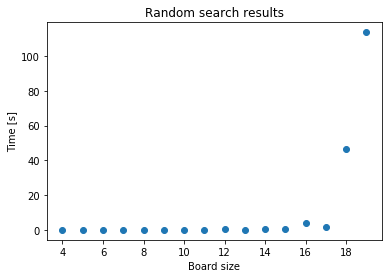

In [8]:
min_board_size, max_board_size = 4, 20
board_sizes = np.arange(min_board_size, max_board_size)
time_results = []

for i in board_sizes:
    board = initialize_the_board(i)
    ttime = time.time()
    s, iterations = random_search()
    res = time.time() - ttime
    time_results.append(res)
    print("Execution time for n = %d: %.3f seconds" %(i, res))
#     print_board(s)
#     print()

plt.scatter(board_sizes, time_results)
plt.xlabel("Board size")
plt.ylabel("Time [s]")
plt.title("Random search results")
plt.show()

We can see that for n about 15 and less Random search performs reasonably well. However for higher values of n time required to find a valid solution increases exponentially, therefore we need more complex approaches. 

Let's now compare performances of Backtracking and Forward checking. We can expand the range of board sizes we want to test. Both approaches are compared only in terms of their execution time.

BT execution time for n=30: 0.043
FC execution time for n=30: 0.018
BT execution time for n=31: 0.677
FC execution time for n=31: 0.052
BT execution time for n=32: 0.368
FC execution time for n=32: 0.024
BT execution time for n=33: 2.159
FC execution time for n=33: 0.005
BT execution time for n=34: 0.430
FC execution time for n=34: 1.654
BT execution time for n=35: 1.028
FC execution time for n=35: 0.010
BT execution time for n=36: 1.362
FC execution time for n=36: 0.393
BT execution time for n=37: 0.535
FC execution time for n=37: 0.069
BT execution time for n=38: 8.361
FC execution time for n=38: 0.025
BT execution time for n=39: 0.389
FC execution time for n=39: 0.003
BT execution time for n=40: 2.461
FC execution time for n=40: 0.059
BT execution time for n=41: 3.014
FC execution time for n=41: 0.187
BT execution time for n=42: 0.870
FC execution time for n=42: 0.064
BT execution time for n=43: 0.814
FC execution time for n=43: 0.437
BT execution time for n=44: 5.565
FC execution t

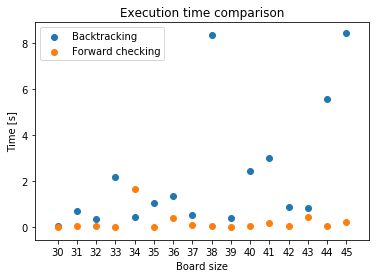

In [9]:
min_board_size, max_board_size = 30, 45
board_sizes = np.arange(min_board_size, max_board_size+1)
BTTime = []
FCTime = []

for i in board_sizes:
    board = initialize_the_board(i)
    
    start = time.time()
    s, iterations = backtracking()
    btTime = time.time() - start
    BTTime.append(time.time() - start)
    print("BT execution time for n=%d: %.3f" %(i, btTime))
#     print("BT iterations:", iterations, '\n')
#     print_board(s)
    
    start = time.time()
    s, iterations = forward_checking()
    fcTime = time.time() - start
    FCTime.append(time.time() - start)
    print("FC execution time for n=%d: %.3f" %(i, fcTime))
#     print("FC iterations:", iterations, '\n')
#     print_board(s)

fig = plt.figure()
timePlot = fig.add_subplot(111)
plt.xticks(np.arange(min_board_size, max_board_size+1, step=1))
timePlot.set_title('Execution time comparison')
timePlot.set_xlabel('Board size')
timePlot.set_ylabel('Time [s]')
btTimePlot = plt.scatter(board_sizes, BTTime, label='Backtracking')
fcTimePlot = plt.scatter(board_sizes, FCTime, label='Forward checking')
timePlot.legend([btTimePlot, fcTimePlot], ['Backtracking', 'Forward checking'])

plt.show()

We can easily notice that - on average - Forward checking performs better than Backtracking.
<br>*Note: try to run this part of the script few times to see if results are consistent. After all we are talking about heuristics*

**Conclusion**: For small values of n the N-Queen problem can be quickly solved simply by using Random search. However when it comes to values like 20 or more you should consider using more complex approach like Backtracking or Forward checking. 